In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=UserWarning, module='sklearn')

In [2]:
#path = "data/pickle/"
X_test = pickle.load(open('X_test_low.pickle', 'rb'))
X_test.shape

(1000, 796)

In [4]:
X_test.shape

SK_ID_CURR                          0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
                                   ..
CC_NAME_CONTRACT_STATUS_nan_MAX     0
CC_NAME_CONTRACT_STATUS_nan_MEAN    0
CC_NAME_CONTRACT_STATUS_nan_SUM     0
CC_NAME_CONTRACT_STATUS_nan_VAR     0
CC_COUNT                            0
Length: 796, dtype: int64

In [2]:
path = "data/pickle/"
with open("X_test_low.pickle", "wb") as file:
    pickle.dump(X_train, file)

NameError: name 'X_train' is not defined

In [49]:
path = 'data/source/'
app_train = pd.read_csv(path + "application_train.csv")

In [15]:
path = "data/pickle/"
with open(path+"app_train.pickle", "wb") as file:
    pickle.dump(app_train, file)
path = "data/pickle/"
with open(path+"app_train.pickle", "rb") as file:
    app_train = pickle.load(file)
app_train.shape

NameError: name 'app_train' is not defined

In [5]:
path = 'data/source/'
app_test = pd.read_csv(path + "application_test.csv")

In [6]:
path = "data/pickle/"
with open(path+"app_test.pickle", "wb") as file:
    pickle.dump(app_test, file)
path = "data/pickle/"
with open(path+"app_test.pickle", "rb") as file:
    app_test = pickle.load(file)
app_test.shape

(48744, 121)

## KNN Plus proche voisin

In [3]:
path = "data/pickle/"
X_train = pickle.load(open(path + 'X_train.pickle', 'rb'))
X_train.shape

(307507, 797)

In [4]:
X_train = X_train[:1000]

In [5]:
X_train.head(2)

,index,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,0.0,100002,0.0,0.0,0.0,0.0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
1,1.0,100003,1.0,0.0,1.0,0.0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0


In [7]:
X_train.drop(['index', 'SK_ID_CURR'], axis=1, inplace=True)

In [8]:
interpretable_important_data = ['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'EXT_SOURCE_1',
 'CODE_GENDER',
 'PAYMENT_RATE',
 'INSTAL_DPD_MEAN',
 'INSTAL_AMT_PAYMENT_SUM',
 'APPROVED_CNT_PAYMENT_MEAN',
 'AMT_ANNUITY',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'NAME_EDUCATION_TYPE_Highereducation',
 'FLAG_OWN_CAR',
 'DAYS_EMPLOYED_PERC',
 'NAME_FAMILY_STATUS_Married']

In [9]:
from sklearn.neighbors import NearestNeighbors
std = StandardScaler()
X_train_std = std.fit_transform(X_train[interpretable_important_data])
X_train_std = pd.DataFrame(X_train_std,
                      index=X_train.index,
                      columns=[interpretable_important_data])

knn = NearestNeighbors(n_neighbors=5)
knn.fit(X_train_std)

NearestNeighbors()

In [10]:
path = "data/pickle/"
with open(path+"knn_low.pickle", "wb") as file:
    pickle.dump(knn, file)

In [11]:
path = "data/pickle/"
with open(path+"knn_low.pickle", "rb") as file:
    knn = pickle.load(file)
knn

NearestNeighbors()

# Load voisins

In [14]:
df_train = pickle.load(open('X_train_low.pickle', 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'X_train_low.pickle'

In [16]:
path = "data/pickle/"
df_test = pickle.load(open(path + 'X_test_low.pickle', 'rb'))
df_train = pickle.load(open(path + 'X_train_low.pickle', 'rb'))
model = pickle.load(open(path + 'model.pickle', 'rb'))
knn = pickle.load(open(path +'knn_low.pickle', 'rb'))
app_train = pickle.load(open(path + 'app_train_low.pickle', 'rb'))
app_test = pickle.load(open(path + 'app_test_low.pickle', 'rb'))

In [17]:
id = 100005
interpretable_important_data = ['EXT_SOURCE_2',
                                    'EXT_SOURCE_3',
                                    'EXT_SOURCE_1',
                                    'CODE_GENDER',
                                    'PAYMENT_RATE',
                                    'INSTAL_DPD_MEAN',
                                    'INSTAL_AMT_PAYMENT_SUM',
                                    'APPROVED_CNT_PAYMENT_MEAN',
                                    'AMT_ANNUITY',
                                    'DAYS_BIRTH',
                                    'DAYS_EMPLOYED',
                                    'NAME_EDUCATION_TYPE_Highereducation',
                                    'FLAG_OWN_CAR',
                                    'DAYS_EMPLOYED_PERC',
                                    'NAME_FAMILY_STATUS_Married']

In [18]:
#selection client
data_client = df_test[df_test["SK_ID_CURR"] == int(id)][interpretable_important_data]

In [19]:
data_client

,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,CODE_GENDER,PAYMENT_RATE,INSTAL_DPD_MEAN,INSTAL_AMT_PAYMENT_SUM,APPROVED_CNT_PAYMENT_MEAN,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,NAME_EDUCATION_TYPE_Highereducation,FLAG_OWN_CAR,DAYS_EMPLOYED_PERC,NAME_FAMILY_STATUS_Married
1,0.291656,0.432962,0.56499,0.0,0.077973,0.111111,56161.845,12.0,17370.0,-18064.0,-4469.0,0.0,0.0,0.247398,1.0


In [20]:
distances, indices = knn.kneighbors(data_client)

In [21]:
X_train_selected = df_train[interpretable_important_data]

In [23]:
# selections des plus proches voisins
df_voisins = X_train_selected.iloc[indices[0], :]
df_voisins

,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,CODE_GENDER,PAYMENT_RATE,INSTAL_DPD_MEAN,INSTAL_AMT_PAYMENT_SUM,APPROVED_CNT_PAYMENT_MEAN,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,NAME_EDUCATION_TYPE_Highereducation,FLAG_OWN_CAR,DAYS_EMPLOYED_PERC,NAME_FAMILY_STATUS_Married
797,0.296604,0.576209,0.506155,0.0,0.063905,0.000000,1.475254e+07,7.750000,16276.5,-10582.0,-2136.0,1.0,0.0,0.201852,1.0
610,0.743420,0.793449,0.506155,1.0,0.036183,0.083916,7.850664e+06,34.285714,17946.0,-20648.0,-1663.0,1.0,0.0,0.120073,1.0
678,0.623843,0.533482,0.506155,1.0,0.039348,2.307054,5.118057e+06,29.454545,74191.5,-22181.0,-1663.0,0.0,0.0,0.120073,1.0
235,0.126332,0.533482,0.506155,1.0,0.038750,0.540146,4.114708e+06,42.000000,66262.5,-23127.0,-9274.0,0.0,0.0,0.401003,1.0
284,0.395245,0.533482,0.506155,0.0,0.079321,0.124555,5.223610e+06,27.000000,32341.5,-20317.0,-2334.0,0.0,1.0,0.114879,1.0


In [25]:
# Selection des colonnes à afficher
affichage_colonne = [    
                        'SK_ID_CURR',
                        'AMT_ANNUITY',
                         'DAYS_BIRTH',
                         'DAYS_EMPLOYED',
                         'NAME_EDUCATION_TYPE',
                         'OCCUPATION_TYPE',

                     ]
df_voisins = app_train.loc[df_voisins.index][affichage_colonne]
df_voisins

,SK_ID_CURR,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,NAME_EDUCATION_TYPE,OCCUPATION_TYPE
797,100912,16276.5,-10582,-2136,Higher education,Waiters/barmen staff
610,100697,17946.0,-20648,365243,Higher education,NaN
678,100784,74191.5,-22181,365243,Secondary / secondary special,NaN
235,100273,66262.5,-23127,-9274,Secondary / secondary special,Medicine staff
284,100327,32341.5,-20317,-2334,Secondary / secondary special,NaN


In [30]:
# traitement champ Day employed
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [31]:
def days_to_duration(days):
        now = datetime.now()
        target_date = now + timedelta(days=days)
        delta = relativedelta(target_date, now)
        return f"{abs(delta.years)}y {abs(delta.months)}m {abs(delta.days)}d"

In [33]:
# Convertir les valeurs de la colonne 'DAYS_EMPLOYED' en nombres
df_voisins['DAYS_EMPLOYED'] = pd.to_numeric(df_voisins['DAYS_EMPLOYED'], errors='coerce')

df_voisins['DAYS_EMPLOYED'] = df_voisins['DAYS_EMPLOYED'].apply(days_to_duration)
# traitement de Day birth
df_voisins['DAYS_BIRTH'] = df_voisins['DAYS_BIRTH'].apply(lambda x: int(x / -365))
df_voisins

ValueError: cannot convert float NaN to integer

In [23]:
# id = request.args.get("id_client")
id = 100005
interpretable_important_data = ['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'EXT_SOURCE_1',
 'CODE_GENDER',
 'PAYMENT_RATE',
 'INSTAL_DPD_MEAN',
 'INSTAL_AMT_PAYMENT_SUM',
 'APPROVED_CNT_PAYMENT_MEAN',
 'AMT_ANNUITY',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'NAME_EDUCATION_TYPE_Highereducation',
 'FLAG_OWN_CAR',
 'DAYS_EMPLOYED_PERC',
 'NAME_FAMILY_STATUS_Married']

In [24]:
path = "data/pickle/"
X_test = pickle.load(open(path + 'X_test.pickle', 'rb'))
X_test.shape

(48744, 797)

In [25]:
knn = pickle.load(open(path + 'knn.pickle', 'rb'))
knn

NearestNeighbors()

In [29]:
# Selction du client
data_client = X_test[X_test["SK_ID_CURR"] == int(id)][interpretable_important_data]
data_client

,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,CODE_GENDER,PAYMENT_RATE,INSTAL_DPD_MEAN,INSTAL_AMT_PAYMENT_SUM,APPROVED_CNT_PAYMENT_MEAN,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,NAME_EDUCATION_TYPE_Highereducation,FLAG_OWN_CAR,DAYS_EMPLOYED_PERC,NAME_FAMILY_STATUS_Married
1,0.291656,0.432962,0.56499,0.0,0.077973,0.111111,56161.845,12.0,17370.0,-18064.0,-4469.0,0.0,0.0,0.247398,1.0


In [30]:
# Knn sur le client
distances, indices = knn.kneighbors(data_client)

In [31]:
X_train_selected = X_train[interpretable_important_data] 

In [32]:
# Affichage des plus proche voisins
df_voisins = X_train_selected.iloc[indices[0], :]
df_voisins

,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,CODE_GENDER,PAYMENT_RATE,INSTAL_DPD_MEAN,INSTAL_AMT_PAYMENT_SUM,APPROVED_CNT_PAYMENT_MEAN,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,NAME_EDUCATION_TYPE_Highereducation,FLAG_OWN_CAR,DAYS_EMPLOYED_PERC,NAME_FAMILY_STATUS_Married
242922,0.625658,0.468660,0.506155,0.0,0.029341,0.202532,2.553705e+07,20.500000,36864.0,-19044.0,-2751.0,1.0,0.0,0.144455,0.0
214385,0.724546,0.586740,0.350850,0.0,0.063964,0.072664,1.678127e+07,25.500000,40297.5,-16471.0,-1179.0,1.0,1.0,0.071580,1.0
296927,0.725592,0.438281,0.506155,0.0,0.040856,0.000000,1.582449e+07,0.000000,41139.0,-15487.0,-2952.0,0.0,1.0,0.190611,1.0
278292,0.640962,0.533482,0.506155,0.0,0.025278,0.127796,1.440273e+07,19.777778,67932.0,-16557.0,-1927.0,0.0,1.0,0.116386,1.0
797,0.296604,0.576209,0.506155,0.0,0.063905,0.000000,1.475254e+07,7.750000,16276.5,-10582.0,-2136.0,1.0,0.0,0.201852,1.0


In [33]:
df_voisins.index

Int64Index([242922, 214385, 296927, 278292, 797], dtype='int64')

In [59]:
# Selection des colonnes à afficher
affichage_colonne = [    
                        'SK_ID_CURR',
                        'AMT_ANNUITY',
                         'DAYS_BIRTH',
                         'DAYS_EMPLOYED',
                         'NAME_EDUCATION_TYPE',
                         'OCCUPATION_TYPE',
                            
                     ]

In [62]:
# Lecture des infos des clients voisins sur app_train
df_voisins = app_train.loc[df_voisins.index][affichage_colonne]
df_voisins

,SK_ID_CURR,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,NAME_EDUCATION_TYPE,OCCUPATION_TYPE
265022,406897,30406.5,-11322,-489,Secondary / secondary special,Sales staff
15501,118093,225000.0,-19672,-12615,Higher education,High skill tech staff
17948,120926,258025.5,-15176,-201,Higher education,Managers
264546,406372,19260.0,-15069,-4110,Secondary / secondary special,Core staff
266144,408304,14521.5,-10840,-3275,Secondary / secondary special,Core staff


In [74]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
def days_to_duration(days):
    now = datetime.now()
    target_date = now + timedelta(days=days)
    delta = relativedelta(target_date, now)
    return f"{abs(delta.years)}y {abs(delta.months)}m {abs(delta.days)}d"

In [65]:
df_voisins['DAYS_BIRTH'] = df_voisins['DAYS_BIRTH'].apply(lambda x: int(x / -365))

In [75]:
df_voisins['DAYS_EMPLOYED'] = df_voisins['DAYS_EMPLOYED'].apply(days_to_duration)

In [76]:
df_voisins

,SK_ID_CURR,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,NAME_EDUCATION_TYPE,OCCUPATION_TYPE
265022,406897,30406.5,31,1y 4m 3d,Secondary / secondary special,Sales staff
15501,118093,225000.0,53,34y 6m 15d,Higher education,High skill tech staff
17948,120926,258025.5,41,0y 6m 19d,Higher education,Managers
264546,406372,19260.0,41,11y 3m 2d,Secondary / secondary special,Core staff
266144,408304,14521.5,29,8y 11m 18d,Secondary / secondary special,Core staff


In [88]:
# fonctions load_voisins
# X_train X_test Knn APP_train
@app.route("/load_voisins", methods=["GET"])
#id = 100005
def load_voisins():
    id = request.args.get("id_client")
    interpretable_important_data = [    'PAYMENT_RATE',
                                    'AMT_ANNUITY',
                                    'DAYS_BIRTH',
                                    'DAYS_EMPLOYED',
                                    'ANNUITY_INCOME_PERC']
    #selection client
    data_client = df_test[X_test["SK_ID_CURR"] == int(id)][interpretable_important_data]
    distances, indices = knn.kneighbors(data_client)
    X_train_selected = X_train[interpretable_important_data]
    # selections des plus proches voisins
    df_voisins = X_train_selected.iloc[indices[0], :]
    # Selection des colonnes à afficher
    affichage_colonne = [    
                            'SK_ID_CURR',
                            'AMT_ANNUITY',
                             'DAYS_BIRTH',
                             'DAYS_EMPLOYED',
                             'NAME_EDUCATION_TYPE',
                             'OCCUPATION_TYPE',

                         ]
    df_voisins = app_train.loc[df_voisins.index][affichage_colonne]
    # traitement champ Day employed
    from datetime import datetime, timedelta
    from dateutil.relativedelta import relativedelta
    def days_to_duration(days):
        now = datetime.now()
        target_date = now + timedelta(days=days)
        delta = relativedelta(target_date, now)
        return f"{abs(delta.years)}y {abs(delta.months)}m {abs(delta.days)}d"
    df_voisins['DAYS_EMPLOYED'] = df_voisins['DAYS_EMPLOYED'].apply(days_to_duration)
    # traitement de Day birth
    df_voisins['DAYS_BIRTH'] = df_voisins['DAYS_BIRTH'].apply(lambda x: int(x / -365))
    return jsonify(df_voisins.to_dict(orient='records'))

In [89]:
df_voisins

,SK_ID_CURR,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,NAME_EDUCATION_TYPE,OCCUPATION_TYPE
265022,406897,30406.5,31,1y 4m 3d,Secondary / secondary special,Sales staff
15501,118093,225000.0,53,34y 6m 15d,Higher education,High skill tech staff
17948,120926,258025.5,41,0y 6m 19d,Higher education,Managers
264546,406372,19260.0,41,11y 3m 2d,Secondary / secondary special,Core staff
266144,408304,14521.5,29,8y 11m 18d,Secondary / secondary special,Core staff


## Affichage graphe info client et voisins

In [53]:
def plot_categorical_variables_bar(data, column_name, figsize = (18,6), percentage_display = True, plot_defaulter = True, rotation = 0, horizontal_adjust = 0, fontsize_percent = 'xx-small'):
    
    '''
    Function to plot Categorical Variables Bar Plots
    
    Inputs:
        data: DataFrame
            The DataFrame from which to plot
        column_name: str
            Column's name whose distribution is to be plotted
        figsize: tuple, default = (18,6)
            Size of the figure to be plotted
        percentage_display: bool, default = True
            Whether to display the percentages on top of Bars in Bar-Plot
        plot_defaulter: bool
            Whether to plot the Bar Plots for Defaulters or not
        rotation: int, default = 0
            Degree of rotation for x-tick labels
        horizontal_adjust: int, default = 0
            Horizontal adjustment parameter for percentages displayed on the top of Bars of Bar-Plot
        fontsize_percent: str, default = 'xx-small'
            Fontsize for percentage Display
        
    '''
    
    #print(f"Total Number of unique categories of {column_name} = {len(data[column_name].unique())}")
    
    plt.figure(figsize = figsize, tight_layout = False)
    sns.set(style = 'whitegrid', font_scale = 1.2)
    
    #plotting overall distribution of category
    plt.subplot(1,2,1)
    data_to_plot = data[column_name].value_counts().sort_values(ascending = False)
    ax = sns.barplot(x = data_to_plot.index, y = data_to_plot, palette = 'Set1')
    
    if percentage_display:
        total_datapoints = len(data[column_name].dropna())
        for p in ax.patches:
            ax.text(p.get_x() + horizontal_adjust, p.get_height() + 0.005 * total_datapoints, '{:1.02f}%'.format(p.get_height() * 100 / total_datapoints), fontsize = fontsize_percent)
        
    plt.xlabel(column_name, labelpad = 10)
    plt.title(f'Distribution of {column_name}', pad = 20)
    plt.xticks(rotation = rotation)
    plt.ylabel('Counts')
    
    #plotting distribution of category for Defaulters
    if plot_defaulter:
        percentage_defaulter_per_category = (data[column_name][data.TARGET == 1].value_counts() * 100 / data[column_name].value_counts()).dropna().sort_values(ascending = False)

        plt.subplot(1,2,2)
        sns.barplot(x = percentage_defaulter_per_category.index, y = percentage_defaulter_per_category, palette = 'Set2')
        plt.ylabel('Percentage of Defaulter per category')
        plt.xlabel(column_name, labelpad = 10)
        plt.xticks(rotation = rotation)
        plt.title(f'Percentage of Defaulters for each category of {column_name}', pad = 20)
        plt.savefig('education_type')
    plt.show()

In [47]:
def print_unique_categories(data, column_name, show_counts = False):
    
    '''
    Function to print the basic stats such as unique categories and their counts for categorical variables
    
        Inputs:
        data: DataFrame
            The DataFrame from which to print statistics
        column_name: str
            Column's name whose stats are to be printed
        show_counts: bool, default = False
            Whether to show counts of each category or not

    '''
    
    print('-'*100)
    print(f"The unique categories of '{column_name}' are:\n{data[column_name].unique()}")
    print('-'*100)
    
    if show_counts:
        print(f"Counts of each category are:\n{data[column_name].value_counts()}")
        print('-'*100)

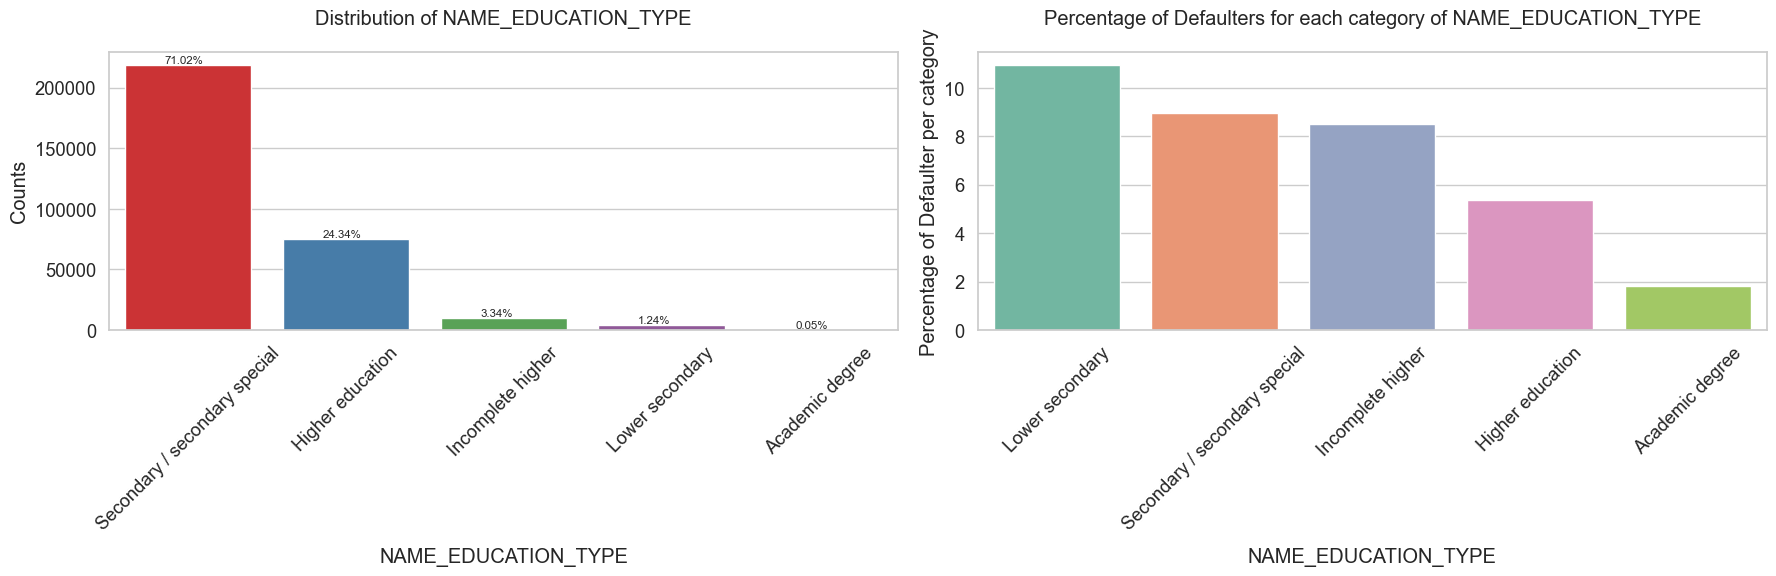

In [54]:
plot_categorical_variables_bar(app_train, column_name = "NAME_EDUCATION_TYPE", rotation = 45, horizontal_adjust = 0.25)

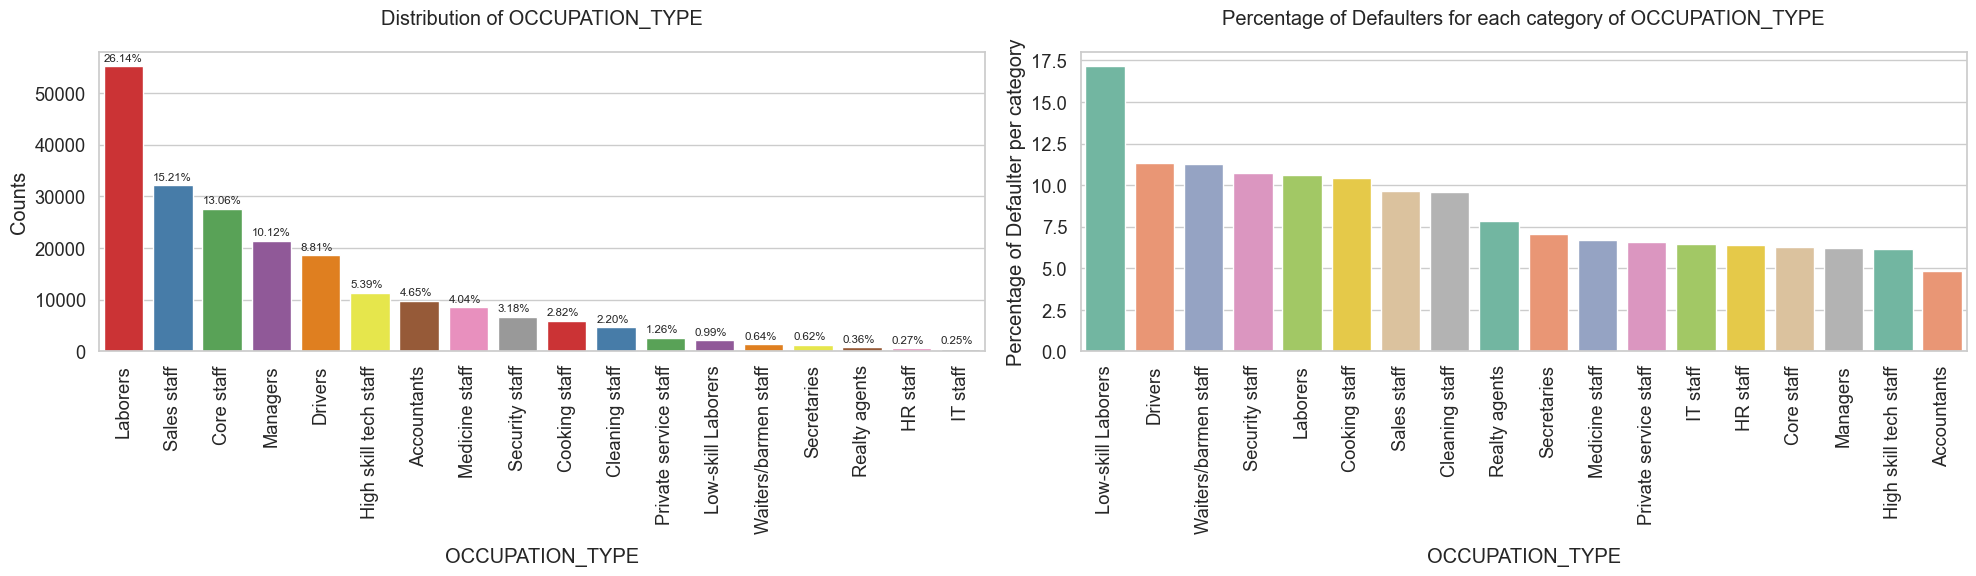

In [52]:
plot_categorical_variables_bar(app_train, column_name = 'OCCUPATION_TYPE', figsize = (20,6), rotation = 90)

In [ ]:
@app.route("/infos_client", methods=["GET"])
def infos_client():
    id = request.args.get("id_client")
    data_client = df_test[df_test["SK_ID_CURR"] == int(id)]

    dict_infos = {
       #"status_famille": data_client["NAME_FAMILY_STATUS"].item(),
       "nb_enfant": data_client["CNT_CHILDREN"].item(),
       "age": int(data_client["DAYS_BIRTH"].values / -365),
       "revenus": data_client["AMT_INCOME_TOTAL"].item(),
       "montant_credit": data_client["AMT_CREDIT"].item(),
       "annuites": data_client["AMT_ANNUITY"].item(),
       "montant_bien": data_client["AMT_GOODS_PRICE"].item()
    }

In [35]:
path = "data/pickle/"
df_test = pickle.load(open(path + 'X_test.pickle', 'rb'))
df_test.shape

(48744, 797)

In [34]:
path = "data/pickle/"
app_test = pickle.load(open(path + 'app_test.pickle', 'rb'))
app_test.shape

(48744, 121)

In [36]:
id = 100005
data_client = df_test[df_test["SK_ID_CURR"] == int(id)]
data_client

,index,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
1,1.0,100005,0.0,0.0,0.0,0.0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0


In [88]:
dict_infos = {
       #"status_famille": data_client["NAME_FAMILY_STATUS"].item(),
       "nb_enfant": data_client["CNT_CHILDREN"].item(),
       "age": int(data_client["DAYS_BIRTH"].values / -365),
       "revenus": data_client["AMT_INCOME_TOTAL"].item(),
       "montant_credit": data_client["AMT_CREDIT"].item(),
       "annuites": data_client["AMT_ANNUITY"].item(),
       "montant_bien": data_client["AMT_GOODS_PRICE"].item(),
       "metier"      : data_client["OCCUPATION_TYPE"].item()
    }

In [89]:
dict_infos

{'nb_enfant': 0,
 'age': 49,
 'revenus': 99000.0,
 'montant_credit': 222768.0,
 'annuites': 17370.0,
 'montant_bien': 180000.0,
 'metier': 'Low-skill Laborers'}

In [80]:

data_client = app_test.loc[app_test['SK_ID_CURR'] == id]
data_client

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [84]:
dict_infos = {
       "status_famille": data_client["NAME_FAMILY_STATUS"].item(),
       "nb_enfant": data_client["CNT_CHILDREN"].item(),
       "age": int(data_client["DAYS_BIRTH"].values / -365),
       "revenus": data_client["AMT_INCOME_TOTAL"].item(),
       "montant_credit": data_client["AMT_CREDIT"].item(),
       "annuites": data_client["AMT_ANNUITY"].item(),
       "montant_bien": data_client["AMT_GOODS_PRICE"].item(),
       "etude"       : data_client["NAME_EDUCATION_TYPE"].item()
        
    }

In [85]:
dict_infos

{'status_famille': 'Married',
 'nb_enfant': 0,
 'age': 49,
 'revenus': 99000.0,
 'montant_credit': 222768.0,
 'annuites': 17370.0,
 'montant_bien': 180000.0,
 'etude': 'Secondary / secondary special'}

In [59]:
dict_infos['status_famille']

'Married'

In [66]:
data_client['NAME_EDUCATION_TYPE'].items()

In [83]:
data_client['NAME_EDUCATION_TYPE']

1    Secondary / secondary special
Name: NAME_EDUCATION_TYPE, dtype: object

In [90]:
data_client['etude']

KeyError: 'etude'

## Requirements.txt

Un fichier requirements.txt est un fichier texte qui liste les dépendances et les versions spécifiques d'un projet Python. Il facilite la gestion des dépendances et permet d'installer facilement les mêmes bibliothèques sur différentes machines.

In [ ]:
# pip freeze > requirements_all.txt
# pip install pipreqs
# pipreqs mon_projet

# pour installer les bibliothèques et les versions spécifiques listées dans le fichier requirements.txt.
#pip install -r requirements.txt

